<a href="https://colab.research.google.com/github/Gabriel-dev-bot/Emptech-2/blob/main/Hands_on_Activity_3_1_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Fundamentals of Computer Vision
Summer Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO. 3.1**</u> | <u>**Data Analysis**</u>
**Name** | Pabilan, Gabriel
**Section** | CPE31S1
**Date Performed**: |14/06/2024
**Date Submitted**: |14/06/2024
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>


**Part 1: The Dataset**

You will use a dataset that contains a sample of 40 right-handed Anglo Introductory Psychology
students at a large Southwestern university. Subjects took four subtests (Vocabulary, Similarities, Block
Design, and Picture Completion) of the Wechsler (1981) Adult Intelligence Scale-Revised. The
researchers used Magnetic Resonance Imaging (MRI) to determine the brain size of the subjects.
Information about gender and body size (height and weight) are also included. The researchers withheld
the weights of two subjects and the height of one subject for reasons of confidentiality. Two simple
modifications were applied to the dataset:
1. Replace the quesion marks used to represent the withheld data points described above by the
'NaN' string. The substitution was done because Pandas does not handle the question marks
correctly.
2. Replace all tab characters with commas, converting the dataset into a CSV dataset.
The prepared dataset is saved as brainsize.txt.

Step 1: Loading the Dataset From a File.
Before the dataset can be used, it must be loaded onto memory.
In the code below, The first line imports the pandas modules and defines pd as a descriptor that refers to
the module.
The second line loads the dataset CSV file into a variable called brainFile.
The third line uses read_csv(), a pandas method, to convert the CSV dataset stored in brainFile into a
dataframe. The dataframe is then stored in the brainFrame variable.
Run the cell below to execute the described functions.

In [10]:
# Code cell 1
import pandas as pd
brainFile = '/content/brainsize.txt'
brainFrame = pd.read_csv(brainFile, delim_whitespace=True)

Step 2: Verifying the dataframe.
To make sure the dataframe has been correctly loaded and created, use the head() method. Another
Pandas method, head() displays the first five entries of a dataframe.


In [11]:
# Code cell 2
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


**Part 2: Scatterplot Graphs and Correlatable Variables**


Step 1: The pandas describe() method.
The pandas module includes the describe() method which performs same common calculations
against a given dataset. In addition to provide common results including count, mean, standard
deviation, minimum, and maximum, describe() is also a great way to quickly test the validity of the
values in the dataframe.
Run the cell below to output the results computed by describe() against the brainFrame dataframe.


In [12]:
# Code cell 3
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Step 2: Scatterplot graphs
Scatterplot graphs are important when working with correlations as they allow for a quick visual
verification of the nature of the relationship between the variables. This lab uses the Pearson correlation
coefficient, which is sensitive only to a linear relationship between two variables. Other more robust
correlation methods exist but are out of the scope of this lab.
a. Load the required modules.
Before graphs can be plotted, it is necessary to import a few modules, namely numpy and matplotlib.
Run the cell below to load these modules.

In [13]:
!pip install matplotlib-venn

In [14]:
# Code cell 4
import numpy as np
import matplotlib.pyplot as plt

b. Separate the data.
To ensure the results do not get skewed because of the differences in male and female bodies, the
dateframe is split into two dataframes: one containing all male entries and another with only female
instances.
Running the cell below creates the two new dataframes, menDf and womenDf, each one containing the
respective entries.

In [15]:
# Code cell 5
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]


c. Plot the graphs.
Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first line
below uses Pandas mean() method to calculate the mean value between the three and store the result in
the menMeanSmarts variable. Notice that the first line also refers to the menDf, the filtered dataframe
containing only male entries.
The second line uses the matplotlib method scatter() to create a scatterplot graph between the
menMeanSmarts variable and the MRI_Countattribute. The MRI_Count in this dataset can be thought as of
a measure of the physical size of the subjects' brains.
The third line simply displays the graph.
The fourth line is used to ensure the graph will be displayed in this notebook.

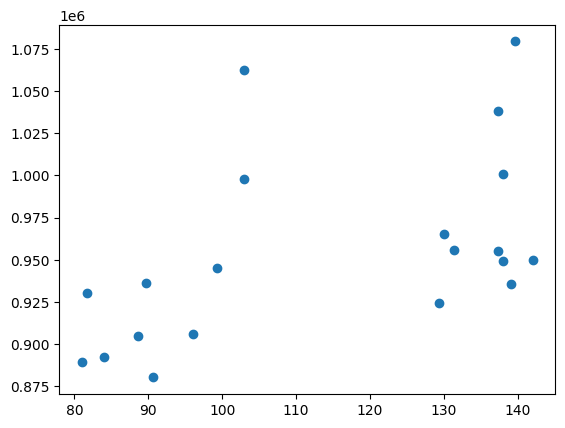

In [16]:
# Code cell 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe.

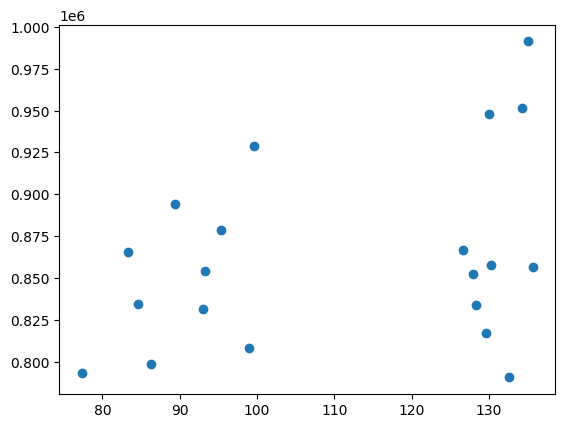

In [18]:
# Code cell 7
# Graph the women-only filtered dataframe
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf ["MRI_Count"])
plt.show()
%matplotlib inline

**Part 3: Calculating Correlation with Python**


Step 1: Calculate correlation against brainFrame.
The pandas corr() method provides an easy way to calculate correlation against a dataframe. By simply
calling the method against a dataframe, one can get the correlation between all variables at the same
time.

In [21]:
# Code cell 8
brainFrame.corr(method='pearson', numeric_only=True)

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filled
with 1s? Is that a coincidence? Explain.
Still looking at the correlation table above, notice that the values are mirrored; values below the 1
diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.
Using the same corr() method, it is easy to calculate the correlation of the variables contained in the
female-only dataframe:


In [22]:
# Code cell 9
womenDf.corr(method='pearson', numeric_only=True)


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


And the same can be done for the male-only dataframe:

In [25]:
# Code cell 10
# Use corr() for the male-only dataframe with the pearson method
menDf.corr(method='pearson', numeric_only=True)

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


**Part 4: Visualizing**


Step 1: Install Seaborn.
To make it easier to visualize the data correlations, heatmap graphs can be used. Based on colored
squares, heatmap graphs can help identify correlations in a glance.
The Python module named seaborn makes it very easy to plot heatmap graphs.
First, run the cell below to download and install the seaborn module.

In [26]:
# Code cell 11
!pip install seaborn

Step 2: Plot the correlation heatmap.
Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in the
cell below:
Line 1: Generates a correlation table based on the womenNoGenderDf dataframe and stores it on wcorr.
Line 2: Uses the seaborn heatmap() method to generate and plot the heatmap. Notice that heatmap()
takes wcorr as a parameter.
Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (it
has the comment # character preceding it, forcing the interpreter to ignore it), it was kept for
informational purposes.


<Axes: >

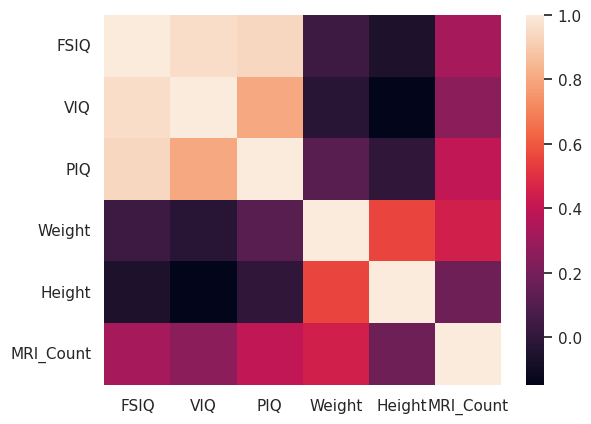

In [34]:
# Code cell 12
import seaborn as sns
sns.set_theme(style="white")
wcorr = womenDf.select_dtypes(include=[np.number]).corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

<Axes: >

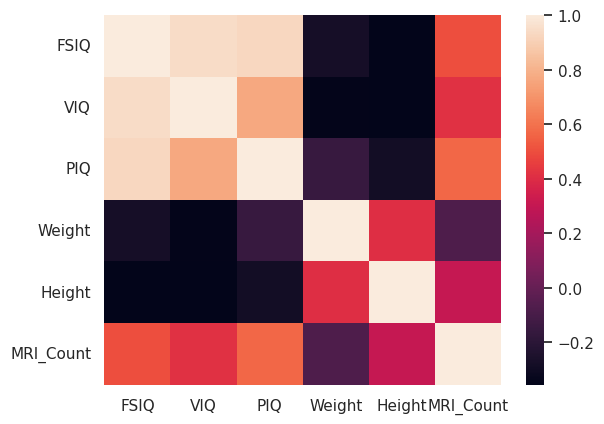

In [36]:
# Code cell 14
mcorr = menDf.select_dtypes(include=[np.number]).corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Many variable pairs present correlation
close to zero. What does that mean?

*It means that correlation is close to zero and it has a week relationship between the variables.  



Why separate the genders?

*To make it easier to see the data.




What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.

*That was not expected. there was a connection found in brain size,It will be Informative or other cognitive development that helps them to associated with higher intelectual measurements.




**Supplementary Activity**

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

csvFile = '/content/World_Wide_Box_Office.csv'
World = pd.read_csv(csvFile)

In [47]:
World.head()

,Rank,Year,Movie,WorldwideBox Office,DomesticBox Office,InternationalBox Office
0,1,2009,Avatar,"$2,845,899,541","$760,507,625","$2,085,391,916"
1,2,2019,Avengers: Endgame,"$2,797,800,564","$858,373,000","$1,939,427,564"
2,3,1997,Titanic,"$2,207,986,545","$659,363,944","$1,548,622,601"
3,4,2015,Star Wars Ep. VII: The Force Awakens,"$2,064,615,817","$936,662,225","$1,127,953,592"
4,5,2018,Avengers: Infinity War,"$2,044,540,523","$678,815,482","$1,365,725,041"


In [52]:
World.tail()

,Rank,Year,Movie,WorldwideBox Office,DomesticBox Office,InternationalBox Office
590,596,2010,Knight and Day,"$258,751,370","$76,423,035","$182,328,335"
591,597,1985,Out of Africa,"$258,210,860","$79,096,868","$179,113,992"
592,598,2011,Super 8,"$257,972,745","$127,004,179","$130,968,566"
593,599,2013,American Hustle,"$257,858,943","$150,098,456","$107,760,487"
594,600,2000,Erin Brockovich,"$257,805,243","$125,548,685","$132,256,558"


In [48]:
World.describe()

,Rank,Year
count,595.000000,595.000000
mean,300.495798,2007.593277
std,173.593185,10.654473
min,1.000000,1939.000000
25%,150.500000,2002.000000
50%,300.000000,2010.000000
75%,450.500000,2015.000000
max,600.000000,2021.000000


In [49]:
World.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     595 non-null    int64 
 1   Year                     595 non-null    int64 
 2   Movie                    595 non-null    object
 3   WorldwideBox Office      595 non-null    object
 4   DomesticBox Office       588 non-null    object
 5   InternationalBox Office  595 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.0+ KB


In [50]:
World.corr(method='pearson', numeric_only=True)

,Rank,Year
Rank,1.000000,-0.264252
Year,-0.264252,1.000000


from matplotlib import pyplot as plt
_df_0['Rank'].plot(kind='hist', bins=20, title='Rank')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Rank', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Rank']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Rank')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Rank'].plot(kind='line', figsize=(8, 4), title='Rank')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

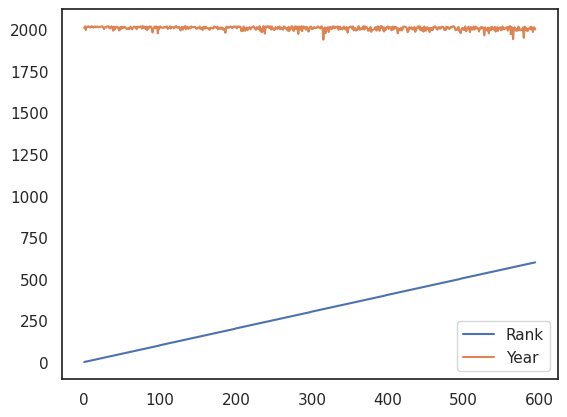

In [51]:
World.plot()

<Axes: >

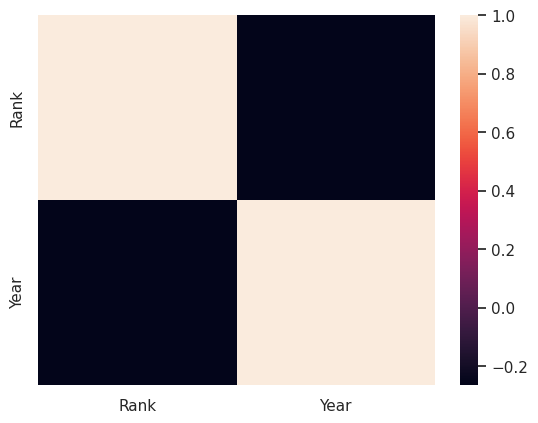

In [59]:
import seaborn as sns
World_column = World.select_dtypes(include=['float', 'int64'])
wcorr = World_column.corr()
sns.heatmap(wcorr)

Conclusion: I learned that dataset contains information about the women data and other attributes. To idetnify the correlatable variable, we need to select numerical columns from the dataset. We attempted to calculate the correlation matrix and using a heatmap.